# Milestone 1 - Data Collection and Preprocessing



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aleenanoor06","key":"7651d711edb118447a03cbd2d41e280b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mexwell/world-air-quality -p /content --unzip

Dataset URL: https://www.kaggle.com/datasets/mexwell/world-air-quality
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/1.63M [00:00<?, ?B/s]
100% 1.63M/1.63M [00:00<00:00, 655MB/s]


In [ ]:
!head -n 20 /content/openaq.csv

﻿Country Code;City;Location;Coordinates;Pollutant;Source Name;Unit;Value;Last Updated;Country Label
BE;;Escautpont;50.420270857658636, 3.551812869268811;SO2;EEA France;µg/m³;3.6;2017-07-18T22:00:00+02:00;Belgium
BG;Teleorman-RNMCA;NET-RO058A;43.650721999999995, 25.363583;CO;EEA Romania;µg/m³;1237.2511399999999;2024-03-11T09:00:00+01:00;Bulgaria
BG;National air network;NET-BG001A;42.518891999999994, 27.375144;O3;EEA Bulgaria;µg/m³;12.06;2024-03-11T08:00:00+01:00;Bulgaria
BG;National air network;NET-BG001A;42.669796999999996, 23.268403000000003;NO;EEA Bulgaria;µg/m³;42.43;2024-03-11T08:00:00+01:00;Bulgaria
BG;National air network;NET-BG001A;43.217279999999995, 27.935959999999998;NO2;EEA Bulgaria;µg/m³;16.6;2024-03-11T08:00:00+01:00;Bulgaria
BR;Rio de Janeiro;São Cristóvão;-22.8961, -43.2212;O3;rio-city-hall;µg/m³;0.0;2023-11-30T15:00:00+01:00;Brazil
BR;Americana;Americana;-22.7242527, -47.33954929;PM10;Sao Paulo CETESB;µg/m³;49.0;2023-04-05T17:00:00+02:00;Brazil
BR;São Paulo;Congonhas;-2

In [ ]:

df = pd.read_csv('/content/openaq.csv', sep=';')

#Look for dataset
print(df.shape)
df.head()



(54551, 10)


,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,Country Label
0,BE,NaN,Escautpont,"50.420270857658636, 3.551812869268811",SO2,EEA France,µg/m³,3.60000,2017-07-18T22:00:00+02:00,Belgium
1,BG,Teleorman-RNMCA,NET-RO058A,"43.650721999999995, 25.363583",CO,EEA Romania,µg/m³,1237.25114,2024-03-11T09:00:00+01:00,Bulgaria
2,BG,National air network,NET-BG001A,"42.518891999999994, 27.375144",O3,EEA Bulgaria,µg/m³,12.06000,2024-03-11T08:00:00+01:00,Bulgaria
3,BG,National air network,NET-BG001A,"42.669796999999996, 23.268403000000003",NO,EEA Bulgaria,µg/m³,42.43000,2024-03-11T08:00:00+01:00,Bulgaria
4,BG,National air network,NET-BG001A,"43.217279999999995, 27.935959999999998",NO2,EEA Bulgaria,µg/m³,16.60000,2024-03-11T08:00:00+01:00,Bulgaria


In [ ]:

df = pd.read_csv('/content/openaq.csv', sep=';')
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce', utc=True)


df = df[['Last Updated','Country Code','City','Location','Pollutant','Value']].copy()

print("Loaded rows:", len(df))
df.head()


Loaded rows: 54551


,Last Updated,Country Code,City,Location,Pollutant,Value
0,2017-07-18 20:00:00+00:00,BE,NaN,Escautpont,SO2,3.60000
1,2024-03-11 08:00:00+00:00,BG,Teleorman-RNMCA,NET-RO058A,CO,1237.25114
2,2024-03-11 07:00:00+00:00,BG,National air network,NET-BG001A,O3,12.06000
3,2024-03-11 07:00:00+00:00,BG,National air network,NET-BG001A,NO,42.43000
4,2024-03-11 07:00:00+00:00,BG,National air network,NET-BG001A,NO2,16.60000


In [ ]:

df_wide = df.pivot_table(
    index=['Last Updated','Country Code','City','Location'],
    columns='Pollutant',
    values='Value',
    aggfunc='mean'
).reset_index()


df_wide.columns.name = None

print("Wide shape:", df_wide.shape)
display(df_wide.head())


Wide shape: (10292, 14)


,Last Updated,Country Code,City,Location,BC,CO,NO,NO2,NOX,O3,PM1,PM10,PM2.5,SO2
0,2014-03-13 12:00:00+00:00,US,Atlanta,SPARTAN - Emory University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
1,2014-08-12 20:00:00+00:00,US,Mammoth Cave NP,SPARTAN - Mammoth Cave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,NaN
2,2015-08-21 01:00:00+00:00,VN,Hanoi,SPARTAN - Vietnam Acad. Sci.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.9,NaN
3,2015-09-25 00:00:00+00:00,SG,Singapore,SPARTAN - NUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,282.9,NaN
4,2016-02-09 20:00:00+00:00,GB,London,Haringey Roadside,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN


In [ ]:

df_wide = df_wide.rename(columns={'Last Updated':'datetime'})


df_wide['datetime'] = pd.to_datetime(df_wide['datetime'], utc=True, errors='coerce')
df_wide = df_wide.sort_values('datetime').reset_index(drop=True)


print("Columns now:", df_wide.columns.tolist()[:20])


Columns now: ['datetime', 'Country Code', 'City', 'Location', 'BC', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM1', 'PM10', 'PM2.5', 'SO2']


In [ ]:

freq = 'D'


numeric_cols = df_wide.select_dtypes(include=[np.number]).columns.tolist()
print("Detected numeric pollutant columns:", numeric_cols)


dfs = []
for loc, g in df_wide.groupby('Location'):
    g = g.set_index('datetime').sort_index()

    g_num = g[numeric_cols].resample(freq).mean()
    g_num = g_num.reset_index()
    g_num['Location'] = loc

    if 'City' in g.columns:
        city_val = g['City'].ffill().bfill().iloc[0] if g['City'].notna().any() else None
        g_num['City'] = city_val
    if 'Country Code' in g.columns:
        cc_val = g['Country Code'].ffill().bfill().iloc[0] if g['Country Code'].notna().any() else None
        g_num['Country Code'] = cc_val
    dfs.append(g_num)

df_resampled = pd.concat(dfs, ignore_index=True)
print("Resampled shape:", df_resampled.shape)
display(df_resampled.head())


Detected numeric pollutant columns: ['BC', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM1', 'PM10', 'PM2.5', 'SO2']
Resampled shape: (1123862, 14)


,datetime,BC,CO,NO,NO2,NOX,O3,PM1,PM10,PM2.5,SO2,Location,City,Country Code
0,2020-03-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3,NaN,1001,CA8 - ARB,US
1,2020-03-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001,CA8 - ARB,US
2,2020-03-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001,CA8 - ARB,US
3,2020-03-07 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001,CA8 - ARB,US
4,2020-03-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001,CA8 - ARB,US


In [ ]:

#handled missing values
df_resampled['datetime'] = pd.to_datetime(df_resampled['datetime'], utc=True, errors='coerce')


numeric_cols = [c for c in df_resampled.columns if c not in ['datetime','Location','City','Country Code']]
print("Numeric cols:", numeric_cols)

parts = []
for loc, g in df_resampled.groupby('Location', sort=False):
    g = g.sort_values('datetime').set_index('datetime')

    if len(g) > 0:
        g_num = g[numeric_cols].interpolate(method='time', limit=7)
        g_num = g_num.ffill().bfill()
        meta = g.drop(columns=numeric_cols, errors='ignore')

        g_out = pd.concat([g_num, meta], axis=1).reset_index()
    else:

        g_out = g.reset_index()
    parts.append(g_out)

df_resampled = pd.concat(parts, ignore_index=True, sort=False)

numeric_present = [c for c in numeric_cols if c in df_resampled.columns]
print("After interpolation — missing counts:")
print(df_resampled[numeric_present].isna().sum())


df_resampled.head()


Numeric cols: ['BC', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM1', 'PM10', 'PM2.5', 'SO2']
After interpolation — missing counts:
BC       1082065
CO        630103
NO        890017
NO2       381546
NOX      1013769
O3        267267
PM1      1123831
PM10      409273
PM2.5     320832
SO2       505706
dtype: int64


,datetime,BC,CO,NO,NO2,NOX,O3,PM1,PM10,PM2.5,SO2,Location,City,Country Code
0,2020-03-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.30,NaN,1001,CA8 - ARB,US
1,2020-03-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.42,NaN,1001,CA8 - ARB,US
2,2020-03-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.54,NaN,1001,CA8 - ARB,US
3,2020-03-07 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.66,NaN,1001,CA8 - ARB,US
4,2020-03-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.78,NaN,1001,CA8 - ARB,US


In [ ]:
def iqr_clip(s, k=1.5):
    if s.dropna().shape[0] < 4:
        return s
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    return s.clip(q1 - k*(q3-q1), q3 + k*(q3-q1))

for col in numeric_cols:
    df_resampled[col] = df_resampled.groupby('Location')[col].transform(lambda s: iqr_clip(s))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_resampled[numeric_cols] = scaler.fit_transform(df_resampled[numeric_cols].fillna(0))

print("Clipping + normalization done.")


Clipping + normalization done.


In [ ]:
df_resampled['dayofweek'] = pd.to_datetime(df_resampled['datetime'], utc=True).dt.dayofweek
df_resampled['month'] = pd.to_datetime(df_resampled['datetime'], utc=True).dt.month
df_resampled['season'] = ((df_resampled['month'] % 12 + 3)//3)

df_resampled.head()


,datetime,BC,CO,NO,NO2,NOX,O3,PM1,PM10,PM2.5,SO2,Location,City,Country Code,dayofweek,month,season
0,2020-03-04 00:00:00+00:00,0.162864,0.017629,0.757189,0.908204,0.041215,0.833036,0.0,0.909083,0.909572,0.247638,1001,CA8 - ARB,US,2,3,2
1,2020-03-05 00:00:00+00:00,0.162864,0.017629,0.757189,0.908204,0.041215,0.833036,0.0,0.909083,0.909765,0.247638,1001,CA8 - ARB,US,3,3,2
2,2020-03-06 00:00:00+00:00,0.162864,0.017629,0.757189,0.908204,0.041215,0.833036,0.0,0.909083,0.909958,0.247638,1001,CA8 - ARB,US,4,3,2
3,2020-03-07 00:00:00+00:00,0.162864,0.017629,0.757189,0.908204,0.041215,0.833036,0.0,0.909083,0.910150,0.247638,1001,CA8 - ARB,US,5,3,2
4,2020-03-08 00:00:00+00:00,0.162864,0.017629,0.757189,0.908204,0.041215,0.833036,0.0,0.909083,0.910343,0.247638,1001,CA8 - ARB,US,6,3,2


In [ ]:
out_path = '/content/openaq_preprocessed_daily.csv'
df_resampled.to_csv(out_path, index=False)
print("Saved preprocessed dataset to:", out_path)


Saved preprocessed dataset to: /content/openaq_preprocessed_daily.csv


Shape: (1123862, 17)
Columns: ['datetime', 'BC', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM1', 'PM10', 'PM2.5', 'SO2', 'Location', 'City', 'Country Code', 'dayofweek', 'month', 'season']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123862 entries, 0 to 1123861
Data columns (total 17 columns):
 #   Column        Non-Null Count    Dtype              
---  ------        --------------    -----              
 0   datetime      1123862 non-null  datetime64[ns, UTC]
 1   BC            1123862 non-null  float64            
 2   CO            1123862 non-null  float64            
 3   NO            1123862 non-null  float64            
 4   NO2           1123862 non-null  float64            
 5   NOX           1123862 non-null  float64            
 6   O3            1123862 non-null  float64            
 7   PM1           1123862 non-null  float64            
 8   PM10          1123862 non-null  float64            
 9   PM2.5         1123862 non-null  float64            
 10  SO2           1123

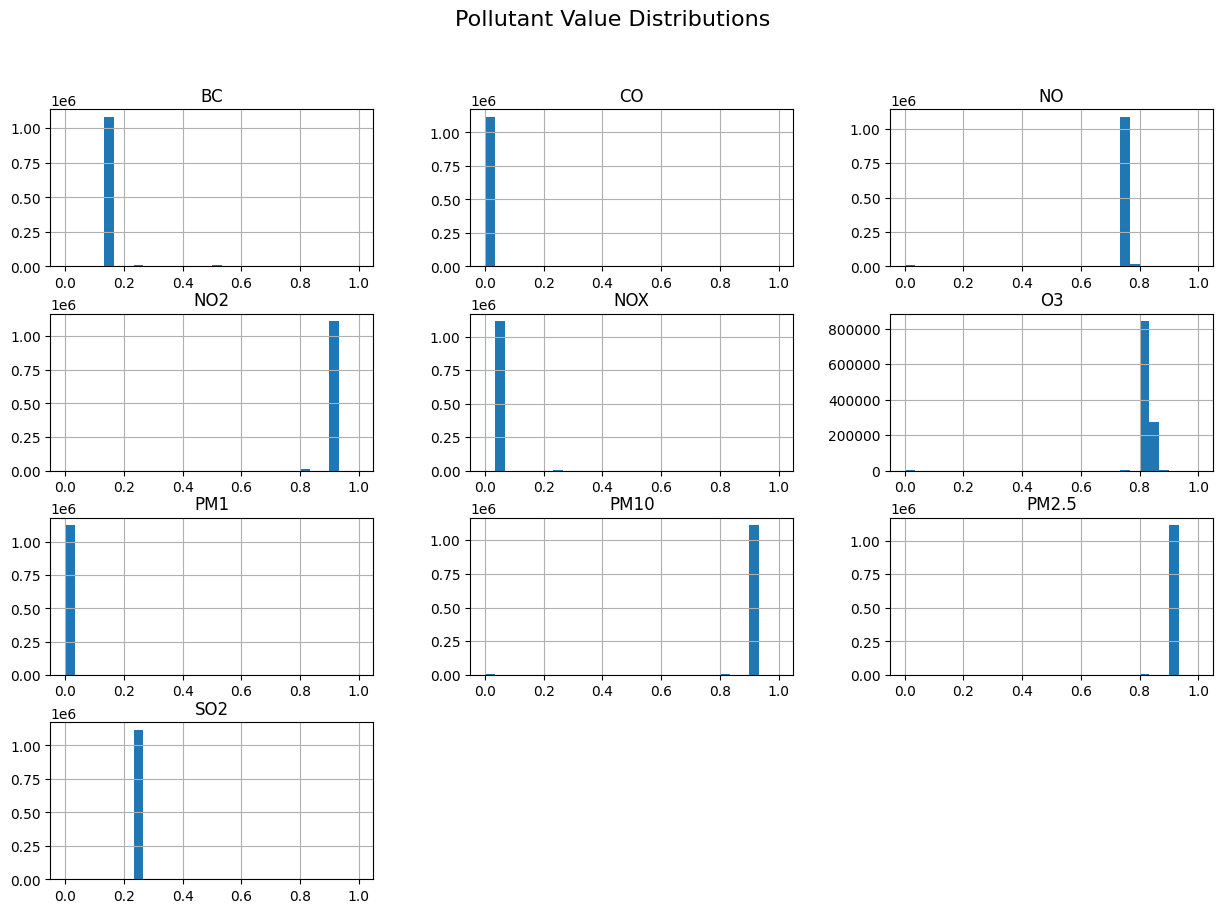

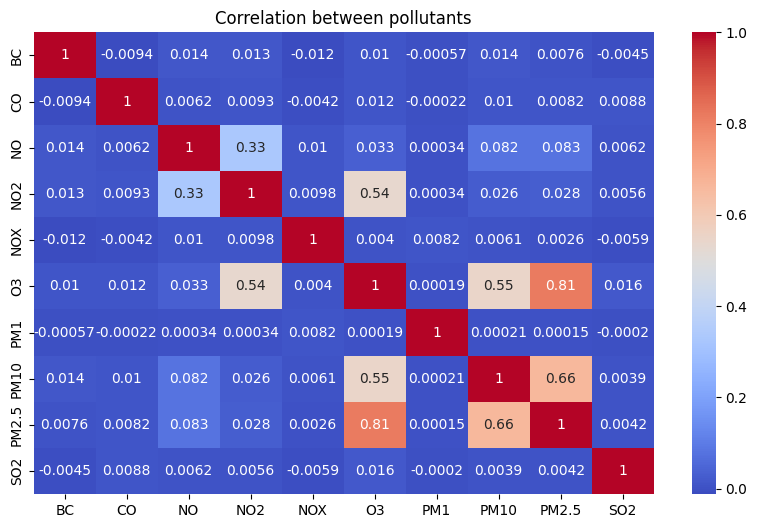

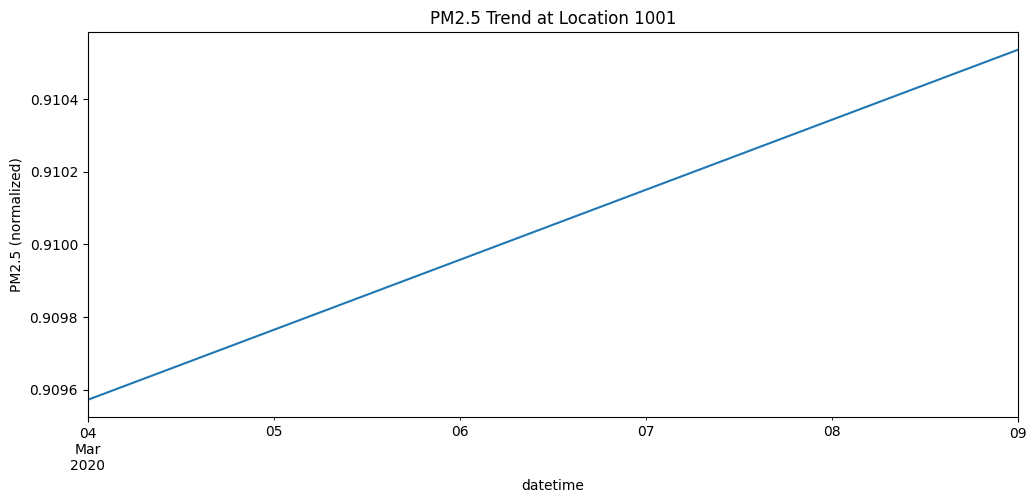

In [ ]:

# Reloading preprocessed dataset
df_resampled = pd.read_csv("/content/openaq_preprocessed_daily.csv")


df_resampled['datetime'] = pd.to_datetime(df_resampled['datetime'], errors='coerce', utc=True)

numeric_cols = [c for c in df_resampled.columns if c not in ['datetime','Location','City','Country Code','dayofweek','month','season']]

# --- Exploratory Data Analysis (EDA) ---

# 1. Dataset overview
print("Shape:", df_resampled.shape)
print("Columns:", df_resampled.columns.tolist())
print(df_resampled.info())
print(df_resampled.describe())

# 2. Missing values summary
missing = df_resampled.isna().sum()
print("\nMissing values per column:")
print(missing[missing > 0])

# 3. Pollutant distributions
df_resampled[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Pollutant Value Distributions", fontsize=16)
plt.show()

# 4. Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_resampled[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between pollutants")
plt.show()

# 5. Time-series trend (example: PM2.5 at first location)
sample_loc = df_resampled['Location'].iloc[0]
df_resampled[df_resampled['Location']==sample_loc].set_index('datetime')['PM2.5'].plot(figsize=(12,5))
plt.title(f"PM2.5 Trend at Location {sample_loc}")
plt.ylabel("PM2.5 (normalized)")
plt.show()


# Milestone 2

Data for Location: 1001, pollutant: PM2.5


,PM2.5
datetime,
2020-03-04 00:00:00+00:00,0.909572
2020-03-05 00:00:00+00:00,0.909765
2020-03-06 00:00:00+00:00,0.909958
2020-03-07 00:00:00+00:00,0.910150
2020-03-08 00:00:00+00:00,0.910343


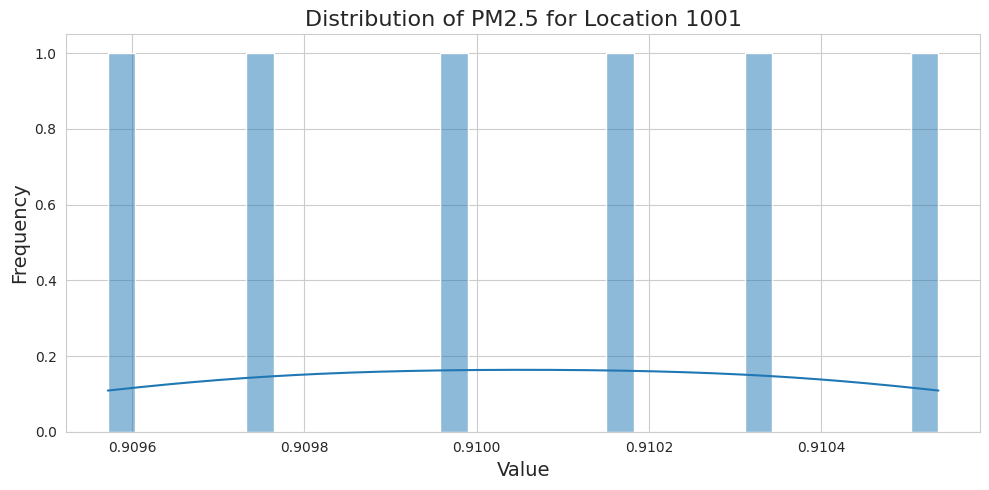

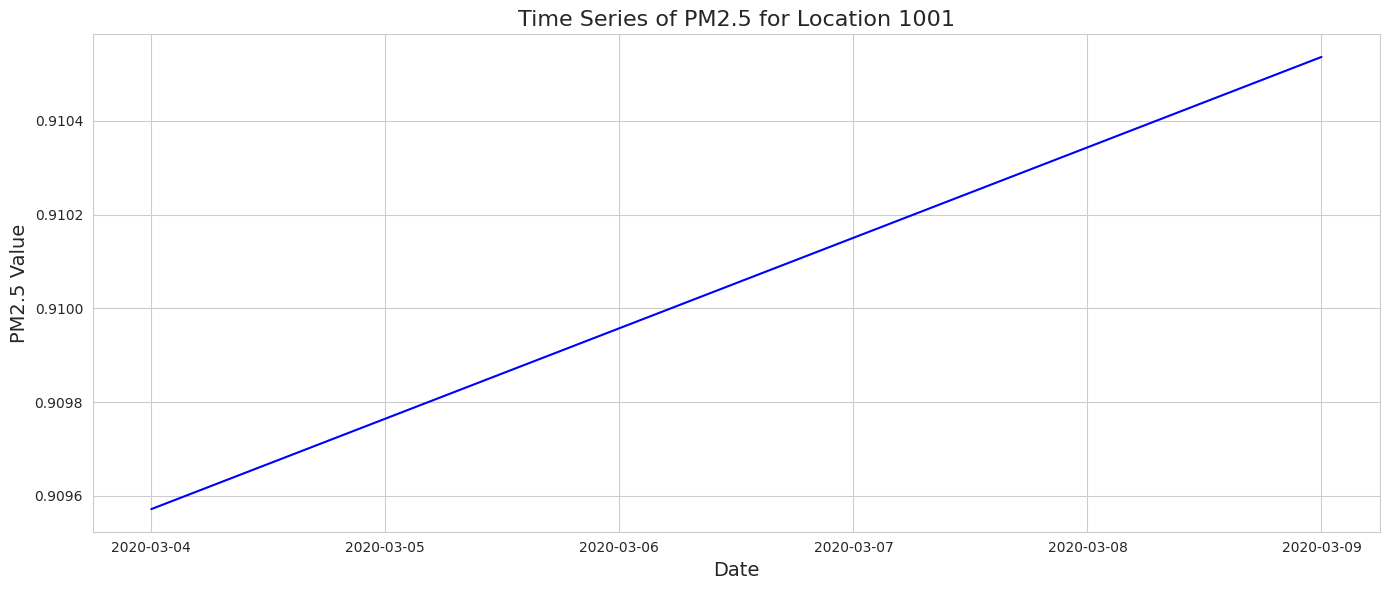

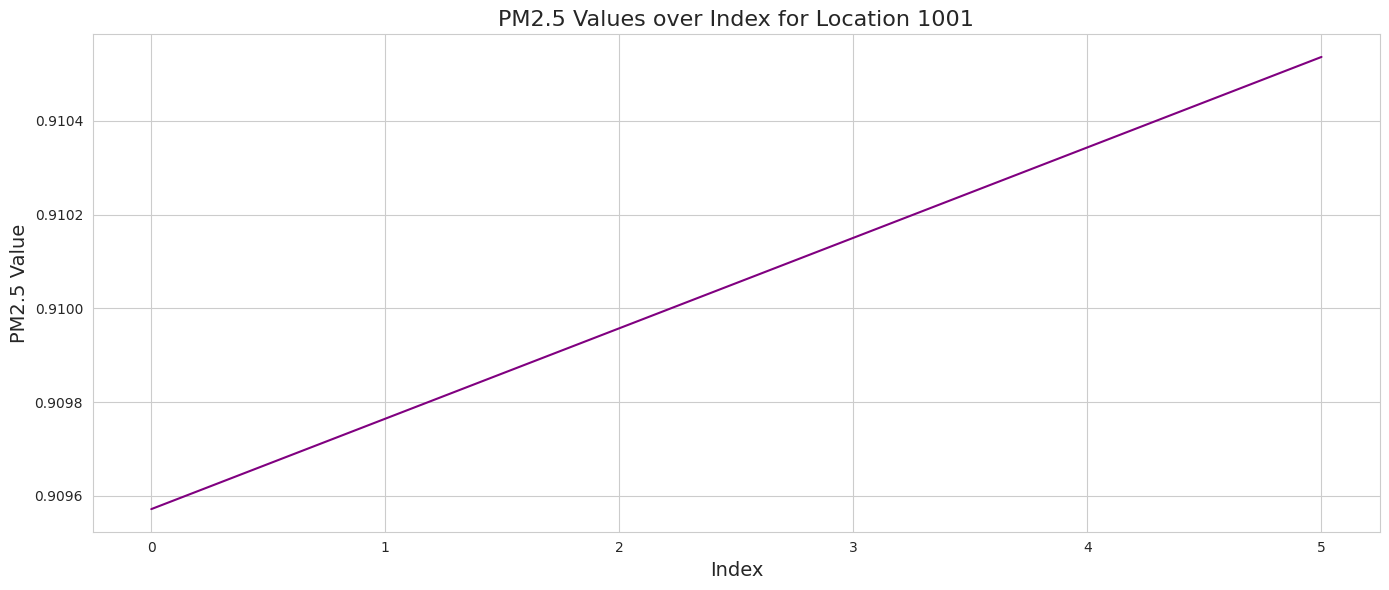

In [ ]:
# Importing Libraries and Choose Target Pollutant + Plot Graphs

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 12
sns.set_style("whitegrid")

# Reloading preprocessed dataset
df = pd.read_csv("/content/openaq_preprocessed_daily.csv", parse_dates=["datetime"])

# Choosing one pollutant to forecast, e.g.,PM2.5
target_pollutant = "PM2.5"
if target_pollutant not in df.columns:
    raise ValueError(f"{target_pollutant} not found in columns: {df.columns}")


sample_loc = df["Location"].iloc[0]
data = df[df["Location"] == sample_loc][["datetime", target_pollutant]].dropna()
data = data.set_index("datetime").sort_index()

print(f"Data for Location: {sample_loc}, pollutant: {target_pollutant}")
display(data.head())



# Distribution
plt.figure(figsize=(10,5))
sns.histplot(data[target_pollutant], bins=30, kde=True)
plt.title(f"Distribution of {target_pollutant} for Location {sample_loc}")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Time Series Trend
plt.figure(figsize=(14,6))
plt.plot(data.index, data[target_pollutant], color='blue')
plt.title(f"Time Series of {target_pollutant} for Location {sample_loc}")
plt.xlabel("Date")
plt.ylabel(f"{target_pollutant} Value")
plt.grid(True)
plt.tight_layout()
plt.show()

# Values Line (Index vs Pollutant)
plt.figure(figsize=(14,6))
plt.plot(range(len(data)), data[target_pollutant], color='purple')
plt.title(f"{target_pollutant} Values over Index for Location {sample_loc}")
plt.xlabel("Index")
plt.ylabel(f"{target_pollutant} Value")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Train-test split
# Use last 20% data for testing
train_size = int(0.8 * len(data))
train, test = data.iloc[:train_size], data.iloc[train_size:]

print("Train size:", len(train), "Test size:", len(test))


Train size: 4 Test size: 2


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA RMSE: 0.00030481908908940806
ARIMA MAE: 0.0002891767400725609


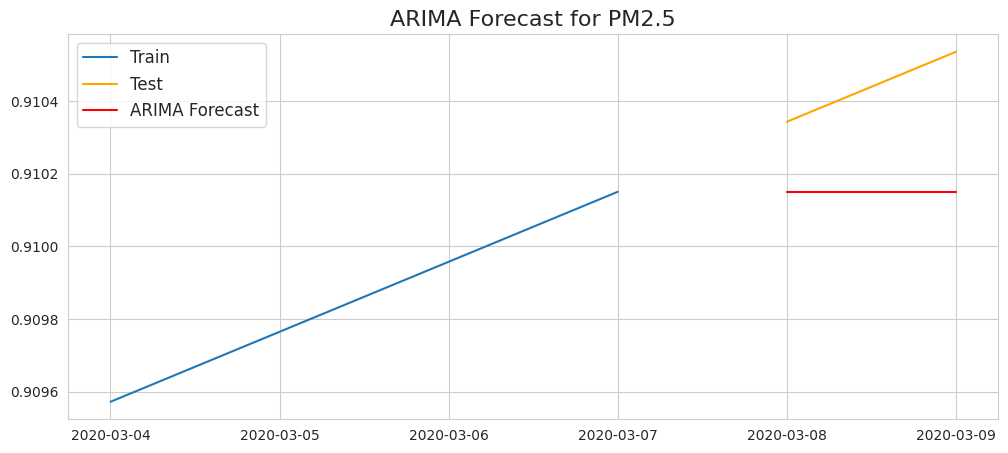

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
arima_order = (5,1,2)  # can be tuned
arima_model = ARIMA(train[target_pollutant], order=arima_order)
arima_result = arima_model.fit()

# Forecast
arima_forecast = arima_result.forecast(steps=len(test))

# Evaluate
arima_rmse = np.sqrt(mean_squared_error(test[target_pollutant], arima_forecast))
arima_mae = mean_absolute_error(test[target_pollutant], arima_forecast)

print("ARIMA RMSE:", arima_rmse)
print("ARIMA MAE:", arima_mae)

# Plot
plt.figure(figsize=(12,5))
plt.plot(train.index, train[target_pollutant], label="Train")
plt.plot(test.index, test[target_pollutant], label="Test", color='orange')
plt.plot(test.index, arima_forecast, label="ARIMA Forecast", color='red')
plt.title(f"ARIMA Forecast for {target_pollutant}")
plt.legend()
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxhl37yz_/2fky__3o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxhl37yz_/9vayu0vy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3052', 'data', 'file=/tmp/tmpxhl37yz_/2fky__3o.json', 'init=/tmp/tmpxhl37yz_/9vayu0vy.json', 'output', 'file=/tmp/tmpxhl37yz_/prophet_model9gq1g2q6/prophet_model-20251021122402.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:24:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:24:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet RMSE: 0.008537250059143497
Prophet MAE: 0.007440276391766365


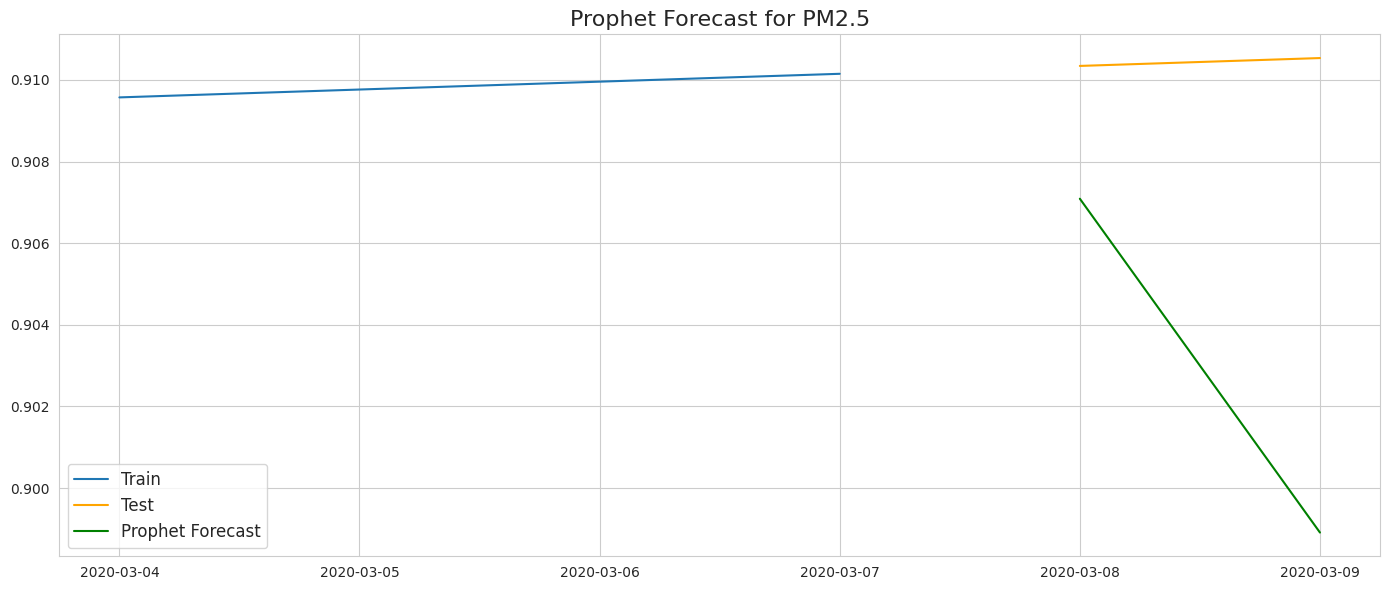

In [ ]:
from prophet import Prophet
import pandas as pd

# preparing data
df_prophet = train.reset_index().rename(columns={"datetime": "ds", target_pollutant: "y"})


df_prophet['ds'] = pd.to_datetime(df_prophet['ds'].dt.strftime('%Y-%m-%d %H:%M:%S'))

# fit Prophet
model_prophet = Prophet(daily_seasonality=True, yearly_seasonality=True)
model_prophet.fit(df_prophet)


future = pd.DataFrame({"ds": pd.to_datetime(test.index.to_series().dt.strftime('%Y-%m-%d %H:%M:%S'))})
forecast_prophet = model_prophet.predict(future)

# Evaluating
prophet_rmse = np.sqrt(mean_squared_error(test[target_pollutant].values, forecast_prophet["yhat"].values))
prophet_mae = mean_absolute_error(test[target_pollutant].values, forecast_prophet["yhat"].values)
print("Prophet RMSE:", prophet_rmse)
print("Prophet MAE:", prophet_mae)

# Plot
plt.figure(figsize=(14,6))
plt.plot(train.index, train[target_pollutant], label="Train")
plt.plot(test.index, test[target_pollutant], label="Test", color='orange')
plt.plot(test.index, forecast_prophet["yhat"].values, label="Prophet Forecast", color='green')
plt.title(f"Prophet Forecast for {target_pollutant}")
plt.legend()
plt.tight_layout()
plt.show()


Total points in series: 6
Short series -> using seq_len = 4
Total sequences created: 2
Shapes raw -> X_train, y_train, X_test, y_test: (1, 4, 1) (1, 1) (1, 4, 1) (1, 1)
Shapes after scaling -> X_train, y_train, X_test, y_test: (1, 4, 1) (1, 1) (1, 4, 1) (1, 1)
Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 1.0812 - val_loss: 1.6785
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 1.0587 - val_loss: 1.6407
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 1.0364 - val_loss: 1.6034
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 1.0144 - val_loss: 1.5665
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.9926 - val_loss: 1.5300
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.9711 - val_loss: 1.4938
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.9497 - val_loss: 1.4580
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.9284 - val_loss: 1.4225
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.9074 - val_loss: 

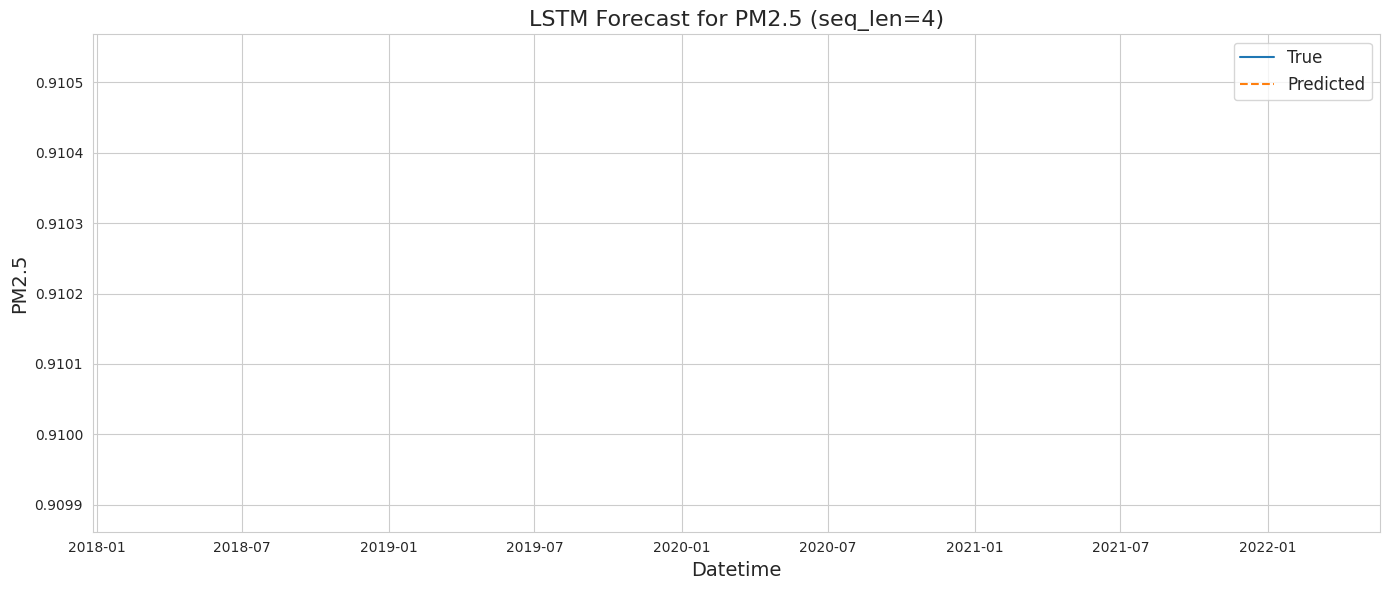

In [ ]:
# Step 5: Simple LSTM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# `data` must already exist (from Step 1) and be indexed by datetime with single column target_pollutant
series = data[[target_pollutant]].dropna().copy()
n_points = len(series)
print("Total points in series:", n_points)


default_seq_len = 7
seq_len = min(default_seq_len, max(1, n_points - 2))
if seq_len != default_seq_len:
    print(f"Short series -> using seq_len = {seq_len}")

# building sequences
vals = series[target_pollutant].values.astype('float32')
time_targets = series.index[seq_len:]   # datetimes for each y
X_all, y_all = [], []
for i in range(len(vals) - seq_len):
    X_all.append(vals[i:i+seq_len].reshape(seq_len,1))
    y_all.append(vals[i+seq_len])
X_all = np.array(X_all)
y_all = np.array(y_all).reshape(-1,1)

if X_all.shape[0] == 0:
    raise ValueError("Not enough data to create any sequence. Use more data or reduce seq_len.")

print("Total sequences created:", X_all.shape[0])

# 80/20 split on sequences
split_idx = int(0.8 * len(X_all))
if split_idx == 0:
    split_idx = 1
if split_idx >= len(X_all):
    split_idx = len(X_all) - 1

X_train_raw, X_test_raw = X_all[:split_idx], X_all[split_idx:]
y_train_raw, y_test_raw = y_all[:split_idx], y_all[split_idx:]
time_test = time_targets[split_idx:]   # datetimes for test targets

print("Shapes raw -> X_train, y_train, X_test, y_test:", X_train_raw.shape, y_train_raw.shape, X_test_raw.shape, y_test_raw.shape)

scaler = MinMaxScaler()
train_flat = X_train_raw.reshape(-1,1)
train_targets_flat = y_train_raw.reshape(-1,1)
scaler.fit(np.vstack([train_flat, train_targets_flat]))

def scale_X(X_raw, scaler):
    N = X_raw.shape[0]
    return scaler.transform(X_raw.reshape(-1,1)).reshape(N, X_raw.shape[1], 1)

X_train = scale_X(X_train_raw, scaler)
X_test  = scale_X(X_test_raw, scaler)
y_train = scaler.transform(y_train_raw)
y_test  = scaler.transform(y_test_raw)

print("Shapes after scaling -> X_train, y_train, X_test, y_test:", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# simple LSTM model (basic)
model = Sequential([LSTM(32, input_shape=(seq_len, 1)), Dense(1)])
model.compile(optimizer='adam', loss='mse')

# training
batch_size = min(16, max(1, X_train.shape[0]))
epochs = 30

if X_test.shape[0] > 0:
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        verbose=1, validation_data=(X_test, y_test))
else:
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)


y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test)

# metrics
lstm_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
lstm_mae  = mean_absolute_error(y_true, y_pred)
print(f"LSTM RMSE: {lstm_rmse:.6f}, MAE: {lstm_mae:.6f}")

# plot
plt.figure(figsize=(14,6))
if len(time_test) == len(y_true):
    plt.plot(time_test, y_true.flatten(), label='True')
    plt.plot(time_test, y_pred.flatten(), linestyle='--', label='Predicted')
    plt.xlabel('Datetime')
else:
    plt.plot(y_true.flatten(), label='True')
    plt.plot(y_pred.flatten(), linestyle='--', label='Predicted')
    plt.xlabel('Index')

plt.title(f"LSTM Forecast for {target_pollutant} (seq_len={seq_len})")
plt.ylabel(target_pollutant)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


,Model,RMSE,MAE
0,ARIMA,0.000305,0.000289
1,Prophet,0.008537,0.007440
2,LSTM,0.000642,0.000642


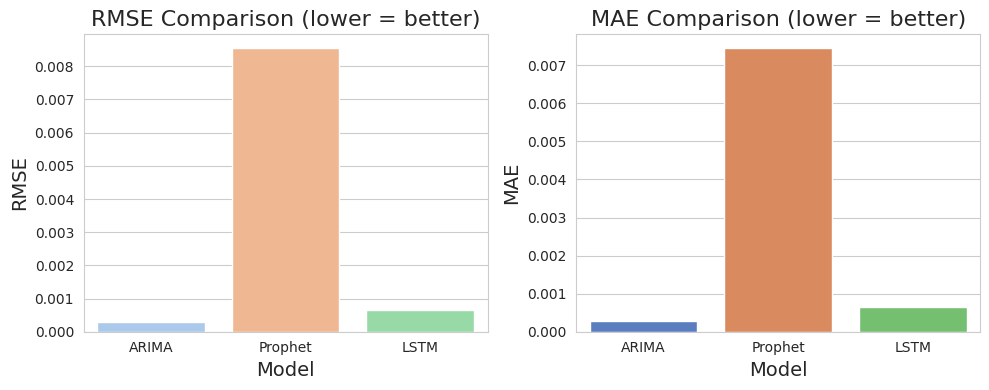

✅ Best Model based on RMSE: ARIMA
Best model (ARIMA) saved as best_model_arima.pkl

🏆 The best-performing model is: ARIMA


In [ ]:
# Model Comparison & Save Best

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Combine model results
results = pd.DataFrame({
    "Model": ["ARIMA", "Prophet", "LSTM"],
    "RMSE": [arima_rmse, prophet_rmse, lstm_rmse],
    "MAE":  [arima_mae,  prophet_mae,  lstm_mae]
})

display(results)


sns.set_style("whitegrid")
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.barplot(x="Model", y="RMSE", data=results, palette="pastel")
plt.title("RMSE Comparison (lower = better)")
plt.ylabel("RMSE")
plt.xlabel("Model")

plt.subplot(1,2,2)
sns.barplot(x="Model", y="MAE", data=results, palette="muted")
plt.title("MAE Comparison (lower = better)")
plt.ylabel("MAE")
plt.xlabel("Model")

plt.tight_layout()
plt.show()


best_model_name = results.loc[results["RMSE"].idxmin(), "Model"]
print("✅ Best Model based on RMSE:", best_model_name)

#Save the best model
if best_model_name == "ARIMA":
    joblib.dump(arima_result, "/content/best_model_arima.pkl")
    print("Best model (ARIMA) saved as best_model_arima.pkl")
elif best_model_name == "Prophet":
    model_prophet.save("/content/best_model_prophet.json")
    print("Best model (Prophet) saved as best_model_prophet.json")
else:
    model.save("/content/best_model_lstm.h5")
    print("Best model (LSTM) saved as best_model_lstm.h5")

print(f"\nThe best-performing model is: {best_model_name}")


In [ ]:
!ls /content


best_model_arima.pkl  kaggle.json  openaq_preprocessed_daily.csv
drive		      openaq.csv   sample_data


In [ ]:
!ls -lh /content/best_model_arima.pkl


-rw-r--r-- 1 root root 104K Oct 21 12:42 /content/best_model_arima.pkl


In [ ]:
import joblib
model_arima = joblib.load("/content/best_model_arima.pkl")
print(model_arima)


In [ ]:
print(model_arima.summary())


                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                    4
Model:                 ARIMA(5, 1, 2)   Log Likelihood                  21.354
Date:                Tue, 21 Oct 2025   AIC                            -26.707
Time:                        14:27:42   BIC                            -33.919
Sample:                    03-04-2020   HQIC                           -41.203
                         - 03-07-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       1.002e-06      0.932   1.07e-06      1.000      -1.827       1.827
ar.L2       4.714e-07      0.933   5.05e-07      1.000      -1.828       1.828
ar.L3      -4.649e-12   1.64e-06  -2.83e-06      1.0